In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import csv
import io
import requests
import matplotlib.pyplot as plt
import datetime
os.chdir('/content/drive/MyDrive/')

# Machine Learning Models

In [ ]:
df_model=pd.read_csv('data.csv')

In [ ]:
df_model

Date  Country  total_cases  new_cases  ...  lag_2  lag_3  lag_4  lag_5
0        1/1/2020        0          0.0          0  ...    NaN    NaN    NaN    NaN
1        1/2/2020        0          0.0          0  ...    NaN    NaN    NaN    NaN
2        1/3/2020        0          0.0          0  ...    0.0    NaN    NaN    NaN
3        1/4/2020        0          0.0          0  ...    0.0    0.0    NaN    NaN
4        1/5/2020        0          0.0          0  ...    0.0    0.0    0.0    NaN
...           ...      ...          ...        ...  ...    ...    ...    ...    ...
60055  11/21/2020      181       9120.0         74  ...   36.0   48.0  111.0  247.0
60056  11/22/2020      181       9172.0         52  ...   65.0   36.0   48.0  111.0
60057  11/23/2020      181       9220.0         48  ...   74.0   65.0   36.0   48.0
60058  11/24/2020      181       9308.0         88  ...   52.0   74.0   65.0   36.0
60059  11/25/2020      181       6189.5        247  ...   48.0   52.0   74.0   65.0

[60060 rows x 74 columns]

In [ ]:
del df_model['first_fatalities']
del df_model['first_confirmed_case']
del df_model['Date']

In [ ]:
df_model=df_model.fillna(0)
df_model=df_model.fillna(0)

In [ ]:
target_var='new_cases'
X=df_model.loc[:,df_model.columns!= target_var]
Y= df_model.loc[:,df_model.columns == target_var]
X

Country  total_cases  total_deaths  ...  lag_3  lag_4  lag_5
0            0          0.0             0  ...    0.0    0.0    0.0
1            0          0.0             0  ...    0.0    0.0    0.0
2            0          0.0             0  ...    0.0    0.0    0.0
3            0          0.0             0  ...    0.0    0.0    0.0
4            0          0.0             0  ...    0.0    0.0    0.0
...        ...          ...           ...  ...    ...    ...    ...
60055      181       9120.0           265  ...   48.0  111.0  247.0
60056      181       9172.0           265  ...   36.0   48.0  111.0
60057      181       9220.0           268  ...   65.0   36.0   48.0
60058      181       9308.0           273  ...   74.0   65.0   36.0
60059      181       6189.5           260  ...   52.0   74.0   65.0

[60060 rows x 70 columns]

# Statistical Evaluation of Models 

## Models with best Parameters

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%tensorflow_version 1.x
from sklearn.datasets import make_regression
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adagrad,Adam,Adadelta
from matplotlib import pyplot
import tensorflow_probability as tfp
from keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,QuantileTransformer,Normalizer,PowerTransformer,RobustScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
X=StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)
X_train

array([[ 1.39898523, -0.16082832, -0.19491762, ..., -0.18221165,
        -0.18230071, -0.18258136],
       [ 1.49415429, -0.15589348, -0.1897123 , ..., -0.14554695,
        -0.15659741, -0.18057865],
       [-0.92313991, -0.15608608, -0.18878532, ..., -0.17954189,
        -0.18086276, -0.18203517],
       ...,
       [ 0.27599028, -0.14842735, -0.18372261, ..., -0.17847399,
        -0.16828073, -0.1376115 ],
       [-0.73280179, -0.16082832, -0.19491762, ..., -0.18221165,
        -0.18230071, -0.18258136],
       [ 0.71376798, -0.16082832, -0.19491762, ..., -0.18221165,
        -0.18230071, -0.18258136]])

In [ ]:
def tuned_model(learn_rate=0.08,neurons=128,activation='relu'):
  model = Sequential()
  model.add(Dense(128,input_dim = X_train.shape[1], activation=activation))
  model.add(Dense(neurons,activation=activation))
  model.add(Dense(neurons,activation=activation))
  model.add(Dense(1,activation=activation))
  opt = Adam(lr=learn_rate)
  model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])
  return model

In [ ]:
fnn = KerasRegressor(build_fn=tuned_model, nb_epoch=100, batch_size=100, verbose=1)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.5,
                max_depth = 10, n_estimators = 60,subsample= 0.7)
ds_reg = DecisionTreeRegressor(criterion = 'friedman_mse', min_weight_fraction_leaf = 0, random_state=0)
gb_reg = GradientBoostingRegressor(loss= 'quantile',learning_rate = 0.1,
                max_depth = 10, n_estimators = 500,subsample= 0.7)

In [ ]:
models = []
models.append(('XGBoost', xg_reg )) 
models.append(('Decision Tree', ds_reg )) 
models.append(('Gradient Boosting',gb_reg))
models.append(('Neural Network',fnn))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGBoost: -1138132.16 (923951.585)
Decision Tree: -1593650.17 (1828858.732)
Gradient Boosting: -1132288.65 (536925.272)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Epoch 1/1
4505/4505 [==============================] - 0s 16us/step
Epoch 1/1
4505/4505 [==============================] - 0s 21us/step
Epoch 1/1
4505/4505 [==============================] - 0s 26us/step
Epoch 1/1
4505/4505 [==============================] - 0s 32us/step
Epoch 1/1
4505/4505 [==============================] - 0s 41us/step
Epoch 1/1
4504/4504 [==============================] - 0s 44us/step
Epoch 1/1
4504/4504 [==============================] - 0s 57us/step
Epoch 1/1
4504/4504 [==============================] - 0s 63us/step
Epoch 1/1
4504/4504 [==============================] - 0s 69us/step
Epoch 1/1
4504/4504 [==============================] - 0s 79us/step
Neural Network: -4083817.03 (6322405.936)


In [ ]:
rmse=[]
for r in results: 
  rmse.append(np.sqrt(-r))

Text(0.5, 1.0, 'Mean RMSE between the selected algorithms')

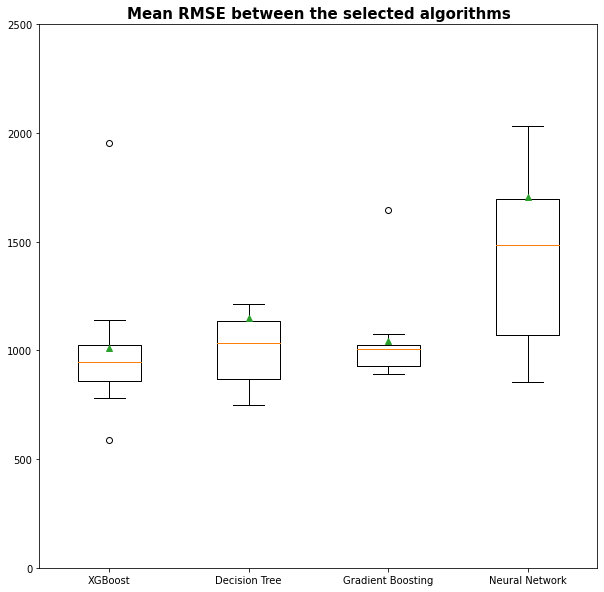

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.boxplot(rmse,labels=names, showmeans=True)
plt.ylim(0, 2500)
plt.title("Mean RMSE between the selected algorithms", fontsize = 15, fontweight = 'bold')

## XGBoost and decision tree:
*	we can see that the p-value is about 0.720, which is much larger than 0.05. 
*	This leads us to fail to reject the null hypothesis, suggesting that any observed difference between the algorithms is probably not real.
*	We could just as easily choose xgboost or decision tree and both would perform about the same on average.
*	This highlights that performing model selection based only on the mean performance may not be sufficient.



In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=xg_reg, 
                          estimator2=ds_reg, 
                          X=X_train, 
                          y=y_train, 
                          scoring='neg_mean_squared_error')
# summarize
print(f'The P-value is = {p:.3f}')
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real.')
else:
    print('Algorithms probably have the same performance')

The P-value is = 0.720
Algorithms probably have the same performance


In [ ]:
from scipy.stats import ttest_rel
kfold = KFold(n_splits=10)
data1=cross_val_score(xg_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
data2=cross_val_score(ds_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=0.713, p=0.494
Same distributions (fail to reject H0)


## XGBoost and gradient boosting:
* we can see that the p-value is about 0.349, which is much larger than 0.05. 
*	This leads us to fail to reject the null hypothesis, suggesting that any observed difference between the algorithms is probably not real.
* We could just as easily choose xgboost or gradient boosting and both would perform about the same on average.
* This highlights that performing model selection based only on the mean performance may not be sufficient.

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=xg_reg, 
                          estimator2=gb_reg, 
                          X=X_train, 
                          y=y_train, 
                          scoring='neg_mean_squared_error')
# summarize
print(f'The P-value is = {p:.3f}')
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real.')
else:
    print('Algorithms probably have the same performance')

The P-value is = 0.994
Algorithms probably have the same performance


In [ ]:
from scipy.stats import ttest_rel
kfold = KFold(n_splits=10)
data1=cross_val_score(xg_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
data2=cross_val_score(gb_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1.463, p=0.178
Same distributions (fail to reject H0)


## XGboost and Neural Network :
* we can see that the p-value is about 0.038, which is lower than 0.05. 
* This leads us to  to fail to reject the null hypothesis, suggesting that any observed difference between the algorithms is probably real.


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=xg_reg, 
                          estimator2=fnn, 
                          X=X_train, 
                          y=y_train, 
                          scoring='neg_mean_squared_error')
# summarize
print(f'The P-value is = {p:.3f}')
# interpret the result
if p <= 0.05:
    print('Difference between mean performance is probably real.')
else:
    print('Algorithms probably have the same performance')

Epoch 1/1
22523/22523 [==============================] - 1s 26us/step
Epoch 1/1
22522/22522 [==============================] - 1s 27us/step
Epoch 1/1
22523/22523 [==============================] - 1s 30us/step
Epoch 1/1
22522/22522 [==============================] - 1s 32us/step
Epoch 1/1
22523/22523 [==============================] - 1s 32us/step
Epoch 1/1
22522/22522 [==============================] - 1s 32us/step
Epoch 1/1
22523/22523 [==============================] - 1s 38us/step
Epoch 1/1
22522/22522 [==============================] - 1s 39us/step
Epoch 1/1
22523/22523 [==============================] - 1s 40us/step
Epoch 1/1
22522/22522 [==============================] - 1s 40us/step
The P-value is = 0.048
Difference between mean performance is probably real.


In [ ]:
from scipy.stats import ttest_rel
kfold = KFold(n_splits=10)
data1=cross_val_score(xg_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
data2=cross_val_score(fnn, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Epoch 1/1
4505/4505 [==============================] - 1s 155us/step
Epoch 1/1
4505/4505 [==============================] - 1s 154us/step
Epoch 1/1
4505/4505 [==============================] - 1s 172us/step
Epoch 1/1
4505/4505 [==============================] - 1s 177us/step
Epoch 1/1
4505/4505 [==============================] - 1s 192us/step
Epoch 1/1
4504/4504 [==============================] - 1s 199us/step
Epoch 1/1
4504/4504 [==============================] - 1s 202us/step
Epoch 1/1
4504/4504 [==============================] - 1s 210us/step
Epoch 1/1
4504/4504 [==============================] - 1s 217us/step
Epoch 1/1
4504/4504 [==============================] - 1s 218us/step
Statistics=3.884, p=0.004
Different distributions (reject H0)


# XGBoost Feature Selection

In [ ]:
target_var='new_cases'
X=df_model.loc[:,df_model.columns!= target_var]
Y= df_model.loc[:,df_model.columns == target_var]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.35)
data1=cross_val_score(xg_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
selcted_features=['total_cases', 'total_deaths', 'new_deaths', 'new_tests',
       'diabetes_prevalence', 'female_smokers', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_internal_movement',
       'contact_tracing', 'urban_pop_%', 'rainfall', 'relative_humidity',
       'liver_disease_%', 'diarrhea_common_infectious_diseases_%',
       'musculoskeletal_disorders_%', 'hospital_density', 'nbr_surgeons',
       'new_cases_trend', 'new_cases_seasonality', 'lag_1', 'lag_2', 'lag_3',
       'lag_4', 'lag_5']
X_train=X_train[selcted_features]
X_test=X_test[selcted_features]
xg_reg_fs = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.5,
                max_depth = 3, n_estimators = 60,subsample= 0.7)
eval_set = [(X_test, y_test)]
kfold = KFold(n_splits=10, random_state=0)
data2=cross_val_score(xg_reg_fs, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
rmse_xg=[]
for r in data1: 
  rmse_xg.append(np.sqrt(-r))

In [ ]:
rmse_fs=[]
for r in data2: 
  rmse_fs.append(np.sqrt(-r))

Text(0.5, 1.0, 'Mean RMSE before and after FS')

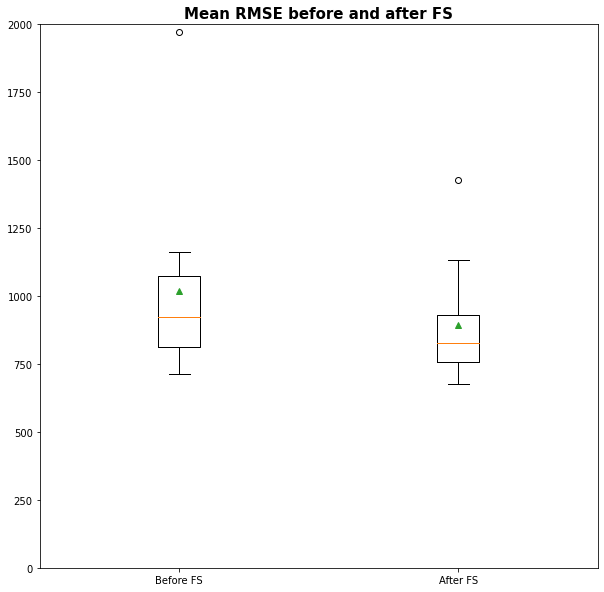

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.boxplot([rmse_xg, rmse_fs],labels=['Before FS', 'After FS'], showmeans=True)
plt.ylim(0, 2000)
plt.title("Mean RMSE before and after FS", fontsize = 15, fontweight = 'bold')

In [ ]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-1.695, p=0.124
Same distributions (fail to reject H0)


# Shap

In [ ]:
!pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-zsz9scvc
  Running command git clone -q https://github.com/slundberg/shap.git /tmp/pip-req-build-zsz9scvc
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=459063 sha256=caac72ee84c0c3a0be3e69755a81be4e9b05ca584c172c5ec7f596f2441c4cd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-q1den5nj/wheels/87/3a/a3/1a2ddf79a5133597bb3e449fdc2eb04a25cab3bbc73cb50230
Successfully built shap


In [ ]:
cat_cols = ['school_closing','workplace_closing','cancel_public_events','restrictions_on_gathering','close_public_transport','stay_at_home',
            'restrictions_on_internal_movement','international_travel_controls','income_support','debt_relief','public_information_campaigns','testing_policy','contact_tracing','new_cases']

In [ ]:
columns_list=df_model.columns

In [ ]:
numerical_list=set(columns_list)^set(cat_cols)

In [ ]:
numerical_list

{'Country',
 'HIV/AIDS_tuberculosis_%',
 'aged_65_older',
 'aged_70_older',
 'average_temperature',
 'cancers_%',
 'cardiovascular_diseases_%',
 'day',
 'density_P/Km²',
 'diabetes_blood_endocrine_diseases_%',
 'diabetes_prevalence',
 'diarrhea_common_infectious_diseases_%',
 'extreme_poverty',
 'female_smokers',
 'fert_Rate',
 'gdp_per_capita',
 'hospital_beds_per10k',
 'hospital_beds_per_thousand',
 'hospital_density',
 'lag_1',
 'lag_2',
 'lag_3',
 'lag_4',
 'lag_5',
 'land_area_Km²',
 'liver_disease_%',
 'malaria_neglected_tropical_diseases_%',
 'male_smokers',
 'maximum_temperature',
 'median_age',
 'medical_doctors_per10k',
 'migrants_net',
 'minimum_temperature',
 'month',
 'musculoskeletal_disorders_%',
 'nbr_anaesthesiologists',
 'nbr_obstetricians',
 'nbr_surgeons',
 'net_change',
 'new_cases_seasonality',
 'new_cases_trend',
 'new_deaths',
 'new_tests',
 'nutritional_deficiencies_%',
 'pneumonia-death-rates',
 'population',
 'rainfall',
 'relative_humidity',
 'respiratory_di

In [ ]:
target_var='new_cases'
X=df_model.loc[:,df_model.columns!= target_var]
Y= df_model.loc[:,df_model.columns == target_var]
X=X[numerical_list]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.35)

In [ ]:
xg_reg_shap = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.5,
                max_depth = 10, n_estimators = 60,subsample= 0.7)
eval_set = [(X_test, y_test)]
xg_reg_shap.fit(X_train,y_train, eval_metric="rmse", eval_set=eval_set)

[0]	validation_0-rmse:3014.14
[1]	validation_0-rmse:1727.51
[2]	validation_0-rmse:1184.63
[3]	validation_0-rmse:1016.48
[4]	validation_0-rmse:983.091
[5]	validation_0-rmse:948.964
[6]	validation_0-rmse:946.319
[7]	validation_0-rmse:950.307
[8]	validation_0-rmse:962.738
[9]	validation_0-rmse:961.139
[10]	validation_0-rmse:960.773
[11]	validation_0-rmse:959.263
[12]	validation_0-rmse:956.461
[13]	validation_0-rmse:956.546
[14]	validation_0-rmse:958.131
[15]	validation_0-rmse:958.797
[16]	validation_0-rmse:958.351
[17]	validation_0-rmse:958.772
[18]	validation_0-rmse:958.012
[19]	validation_0-rmse:958.247
[20]	validation_0-rmse:958.285
[21]	validation_0-rmse:957.375
[22]	validation_0-rmse:956.556
[23]	validation_0-rmse:956.449
[24]	validation_0-rmse:955.522
[25]	validation_0-rmse:956.159
[26]	validation_0-rmse:956.037
[27]	validation_0-rmse:955.809
[28]	validation_0-rmse:955.832
[29]	validation_0-rmse:955.981
[30]	validation_0-rmse:956.411
[31]	validation_0-rmse:956.643
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=60,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [ ]:
import shap
explainer = shap.TreeExplainer(xg_reg_shap)

In [ ]:
shap_values = explainer.shap_values(X_train,check_additivity=False)

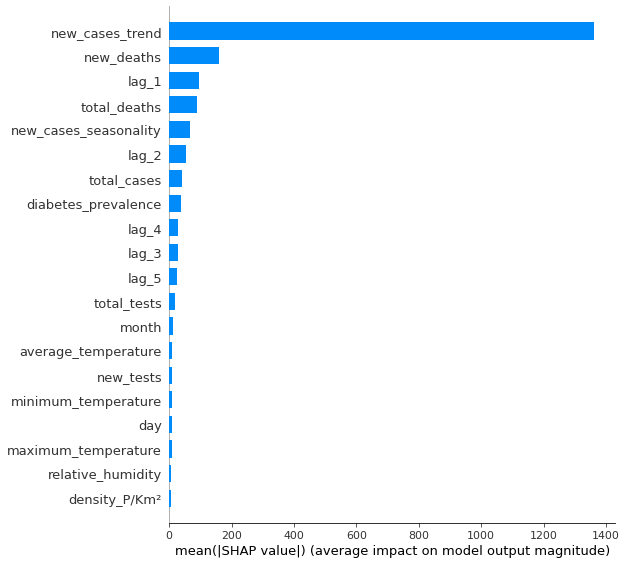

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

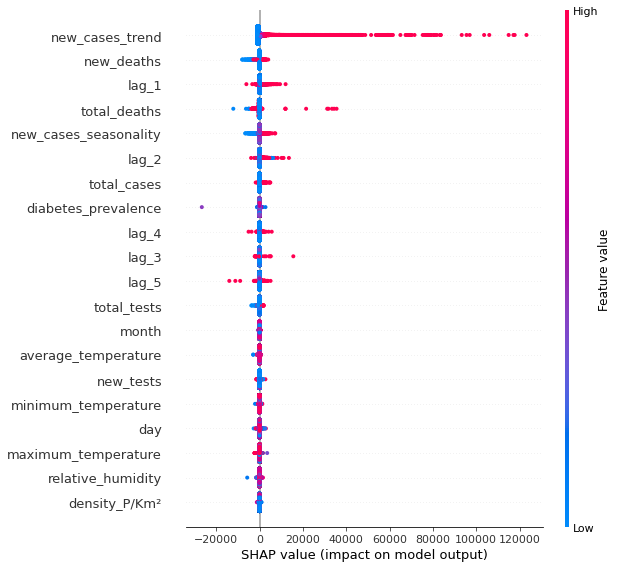

In [ ]:
shap.summary_plot(shap_values, X_train)

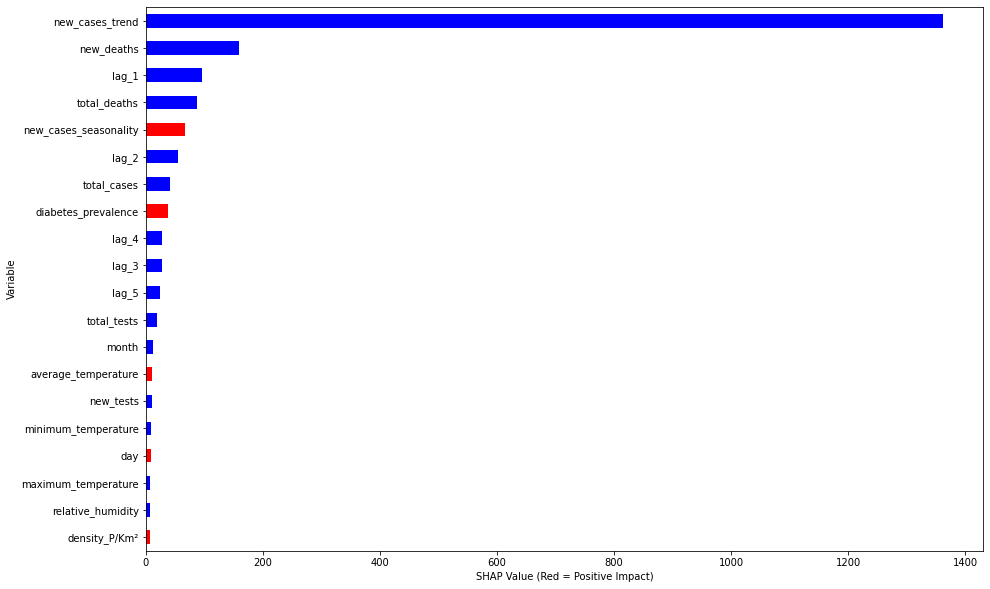

In [ ]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    sel_features=['new_cases_trend','new_deaths','lag_1','total_deaths','new_cases_seasonality','lag_2','total_cases','diabetes_prevalence','lag_4','lag_3','lag_5','total_tests','month','average_temperature'
    ,'new_tests','minimum_temperature','day','maximum_temperature','relative_humidity','density_P/Km²']
    feature_list = df.columns
    shap_v.columns = feature_list
    shap_v=shap_v[sel_features]
    df_v = df.copy().reset_index().drop('index',axis=1)
    df_v=df_v[sel_features]
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in shap_v.columns:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(15,10),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train) 

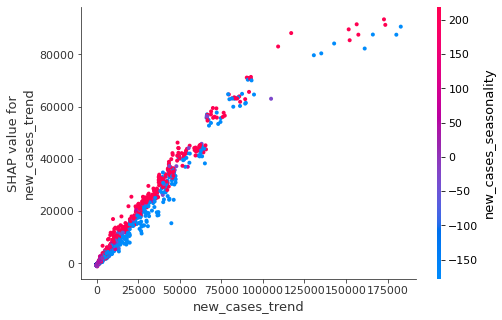

In [ ]:
shap.dependence_plot('new_cases_trend', shap_values, X_train)

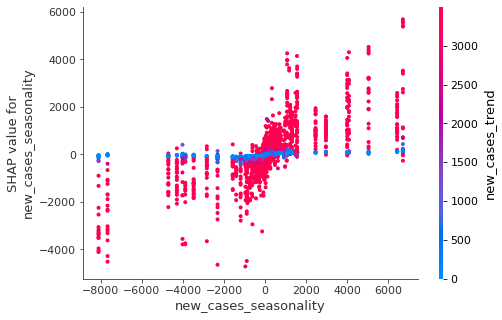

In [ ]:
shap.dependence_plot('new_cases_seasonality', shap_values, X_train)

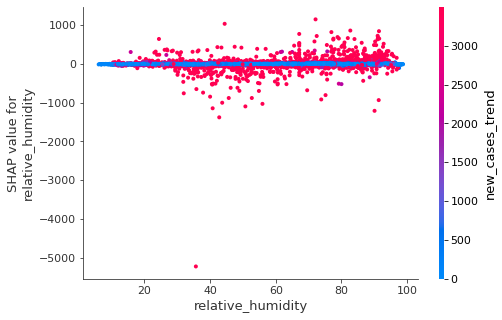

In [ ]:
shap.dependence_plot('relative_humidity', shap_values, X_train)

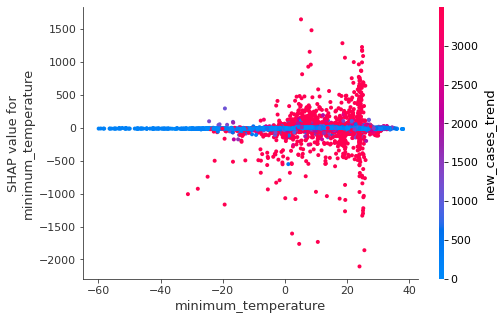

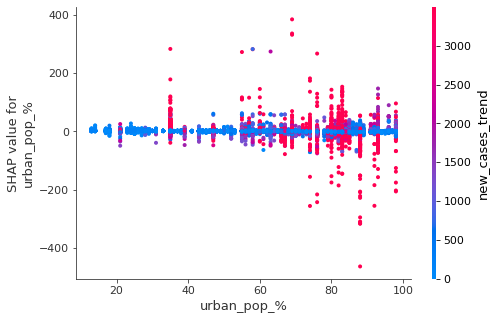

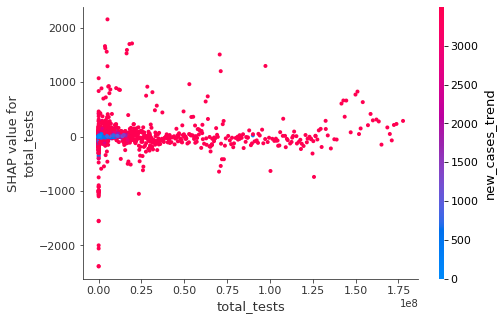

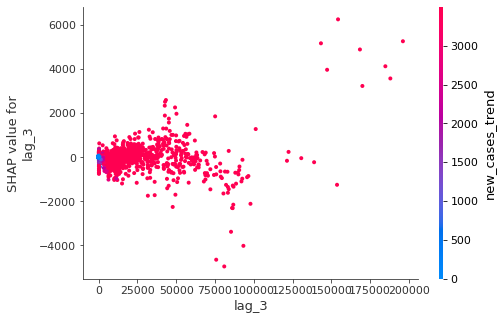

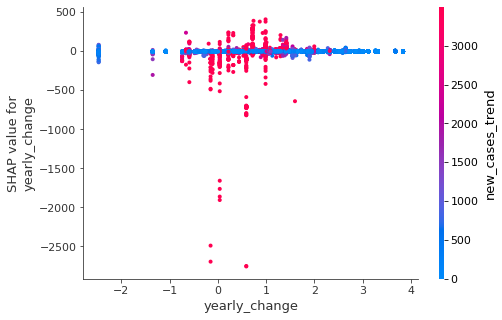

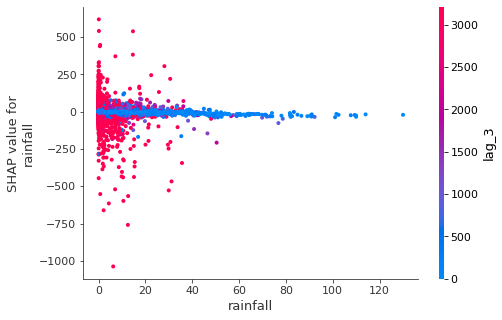

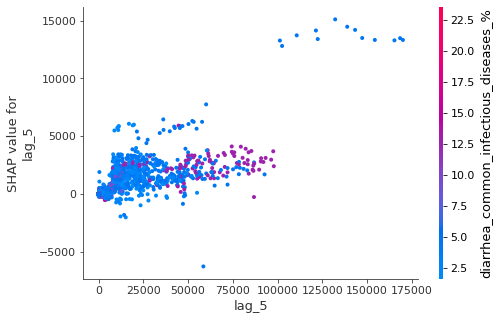

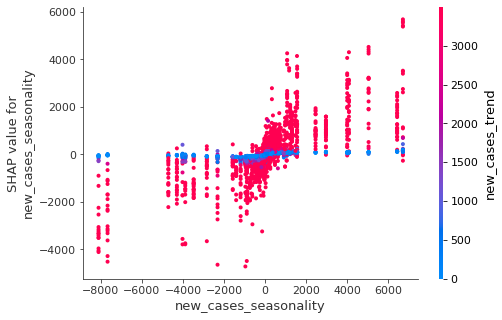

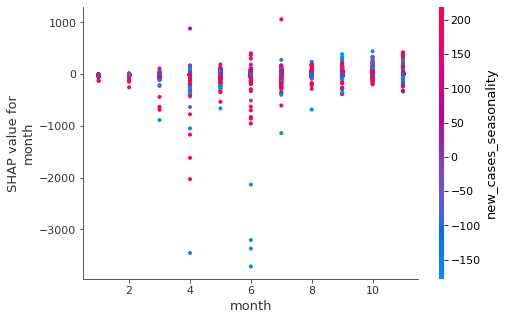

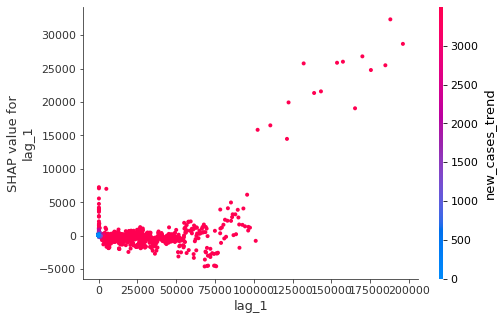

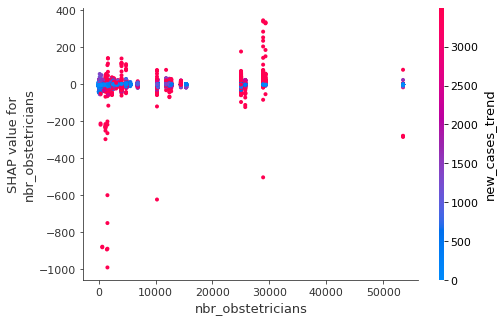

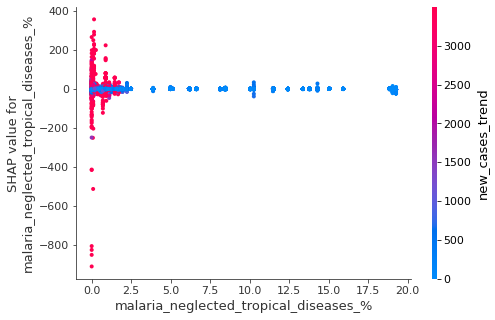

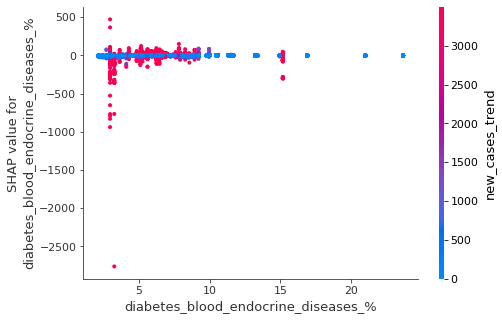

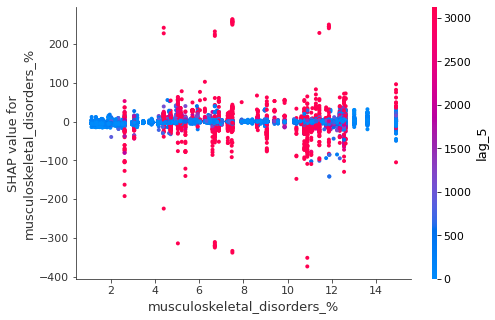

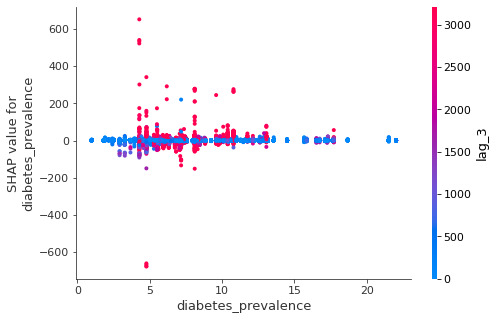

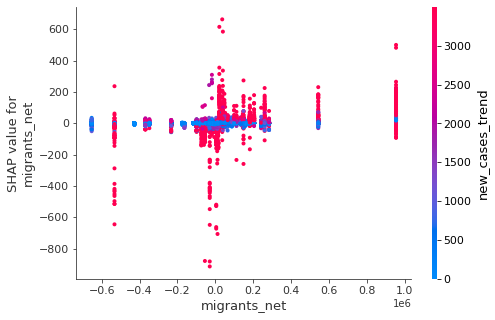

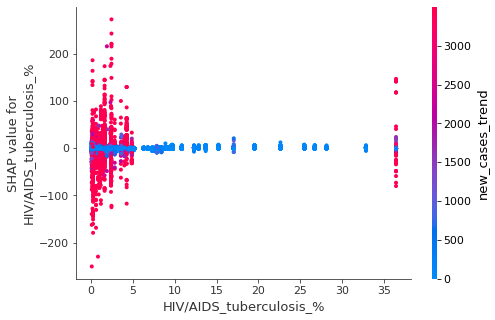

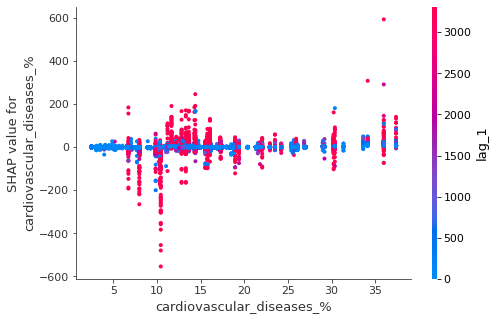

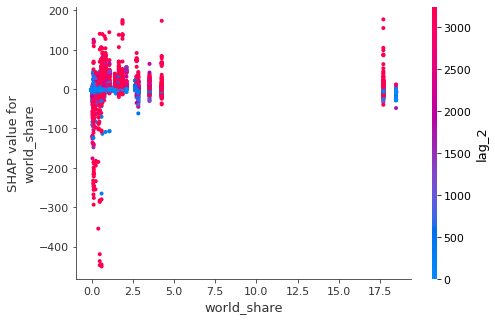

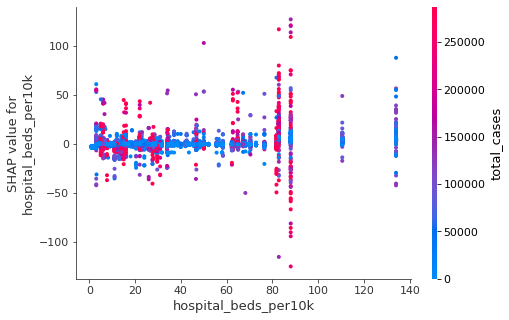

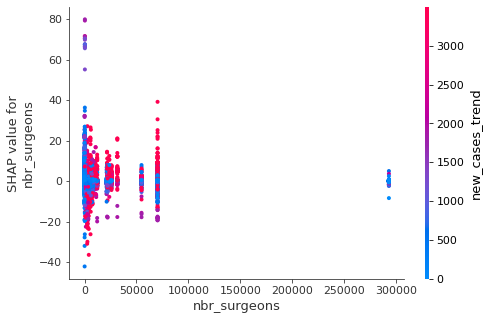

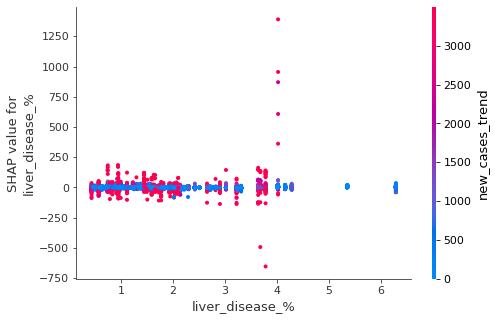

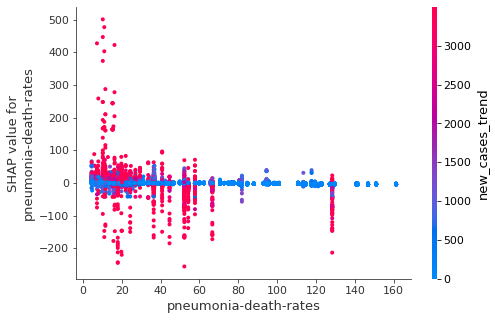

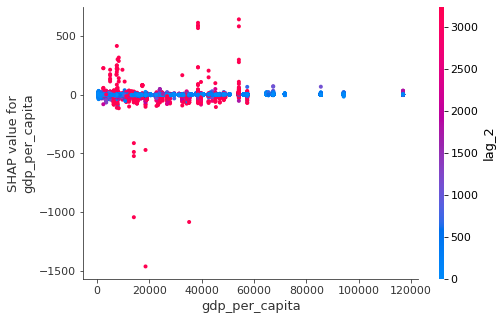

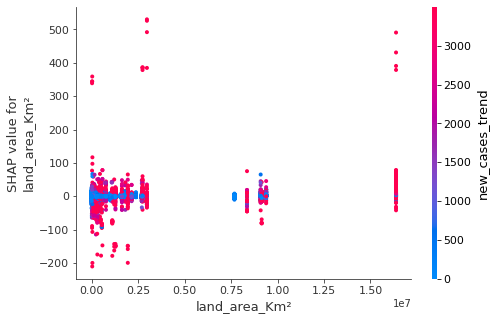

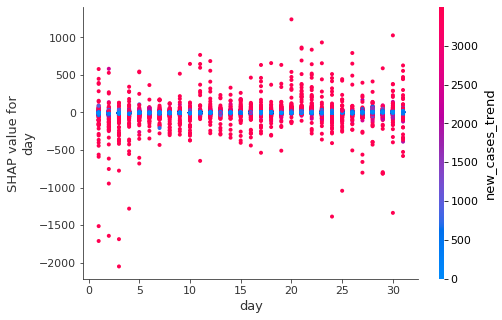

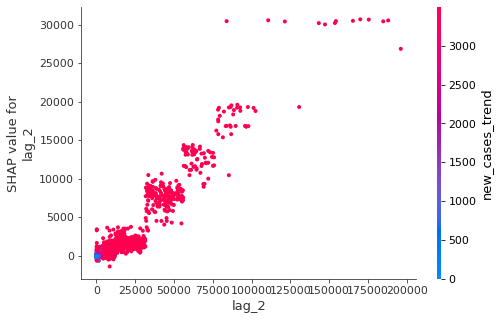

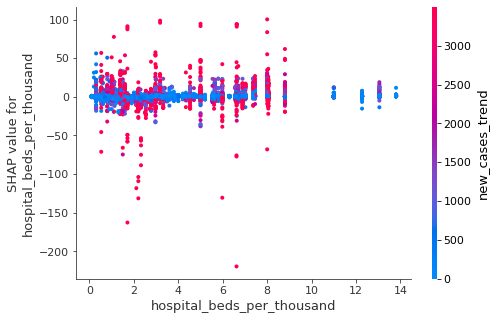

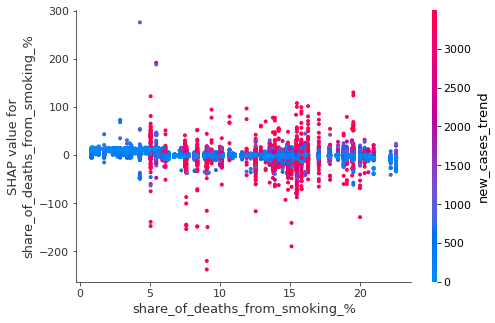

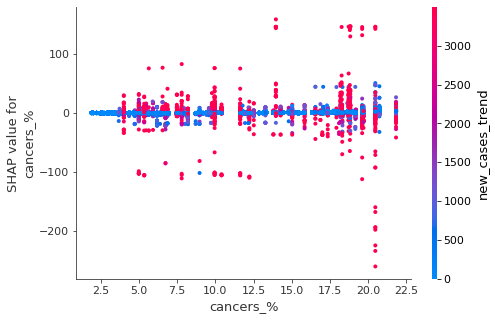

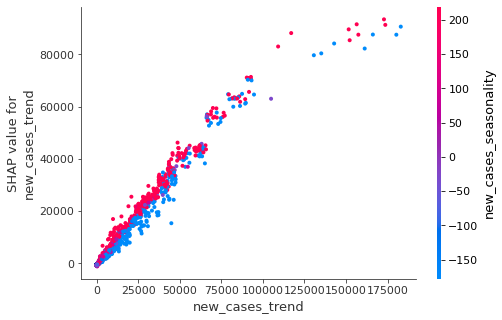

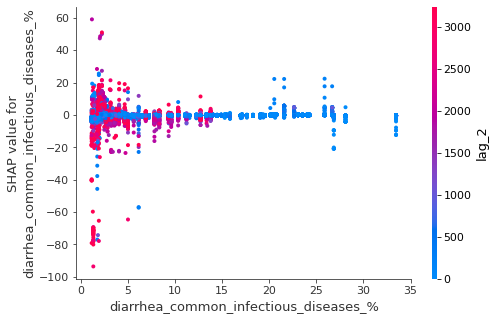

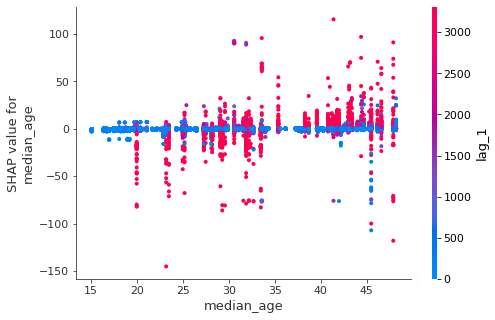

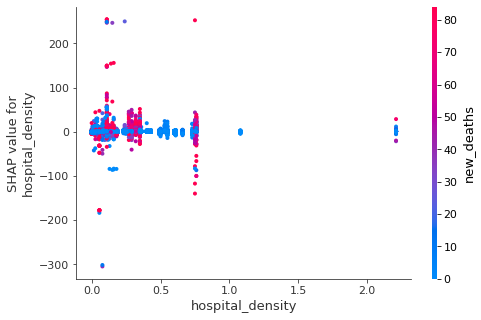

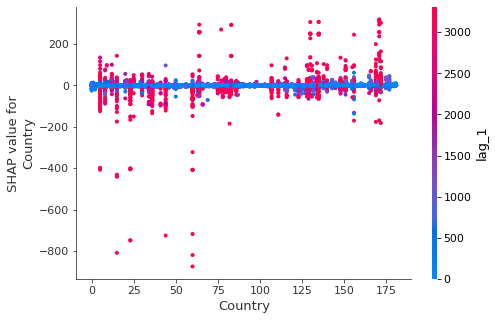

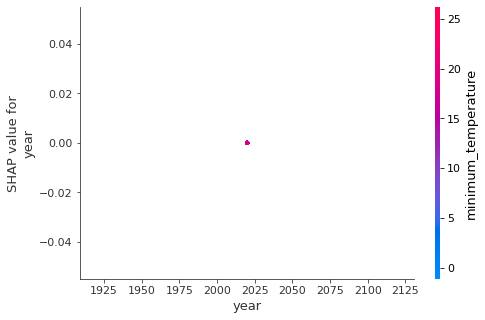

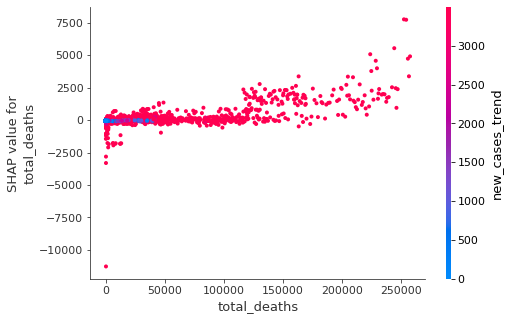

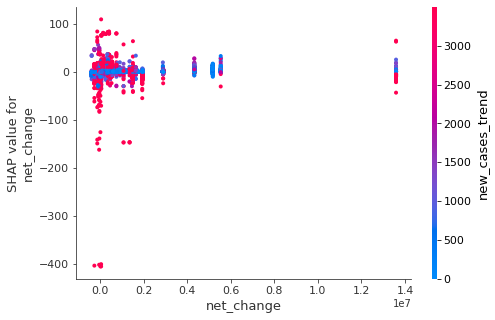

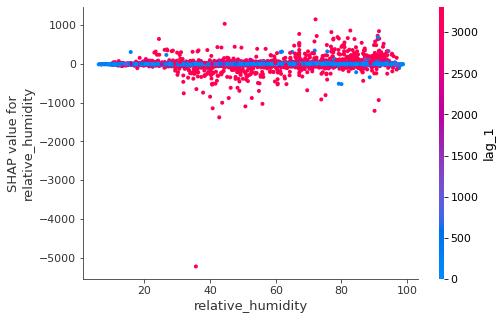

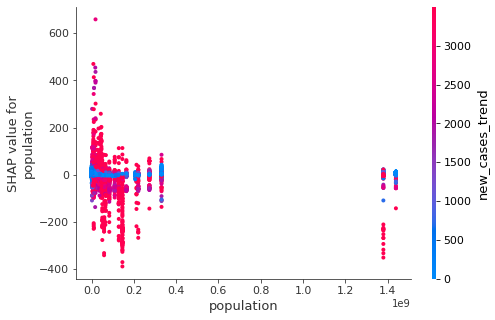

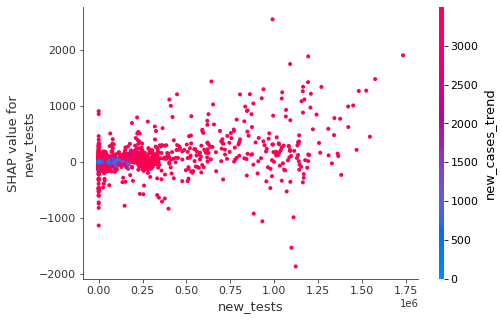

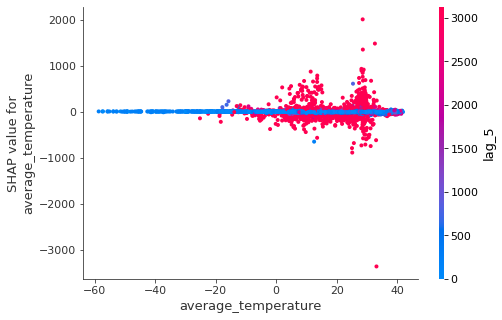

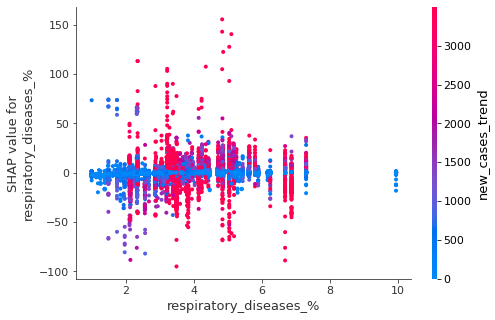

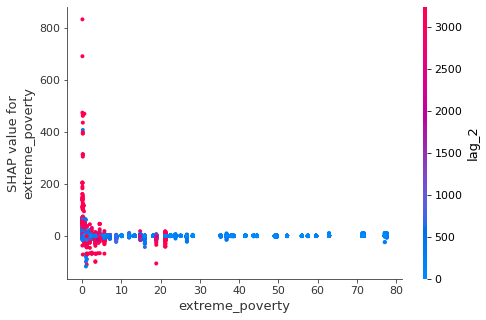

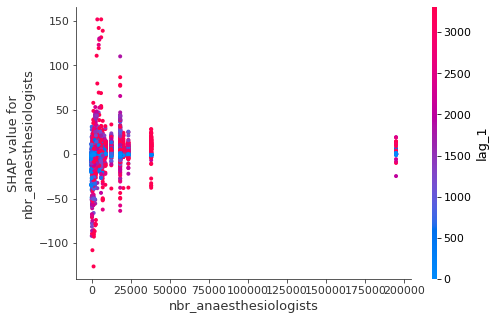

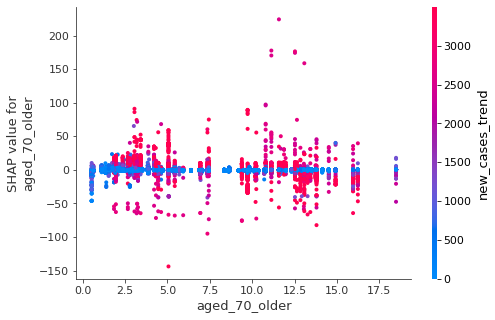

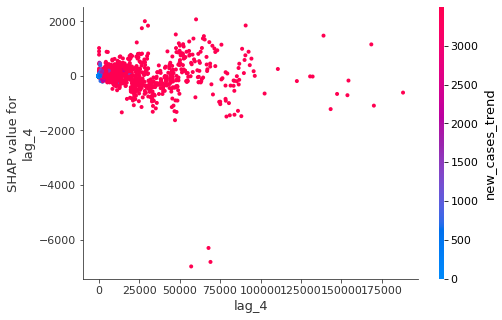

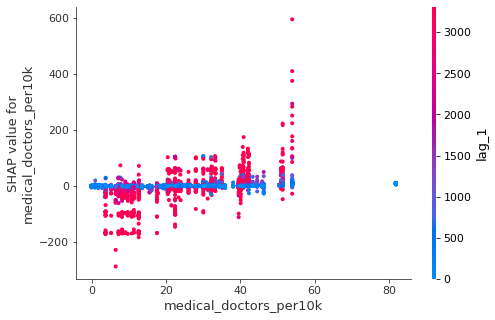

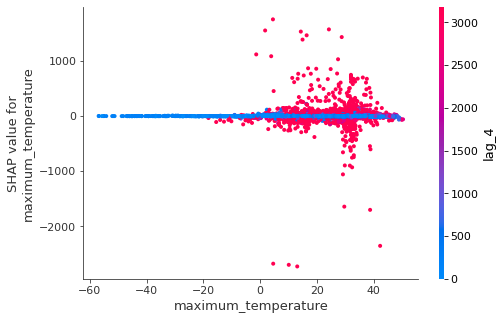

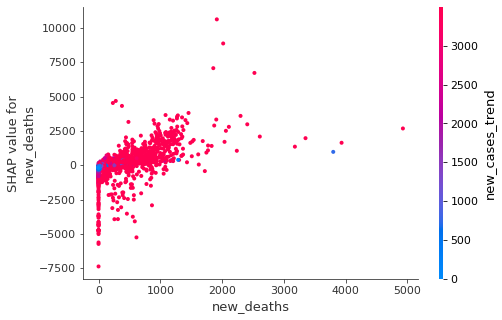

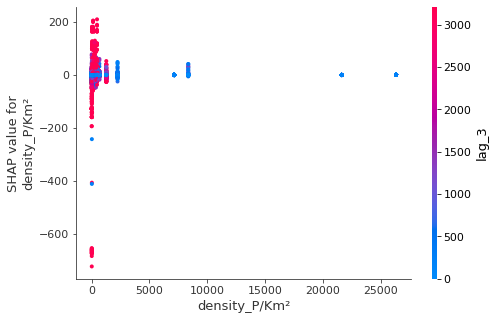

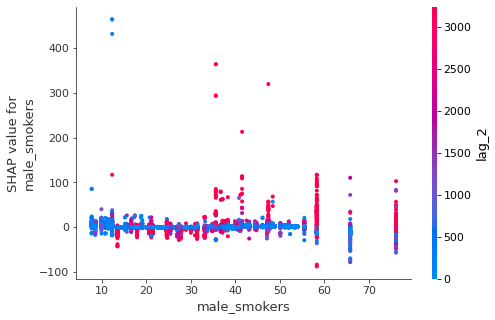

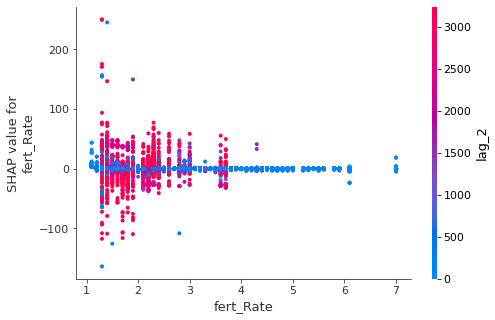

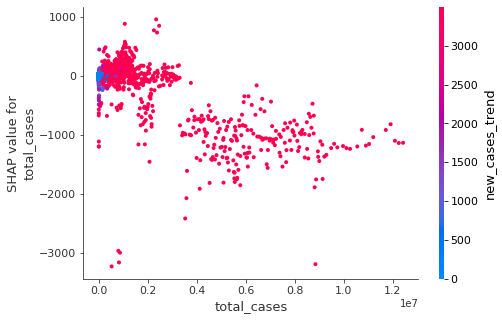

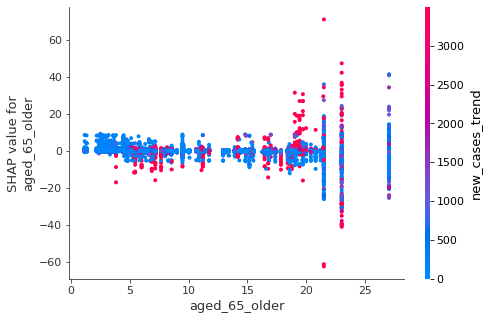

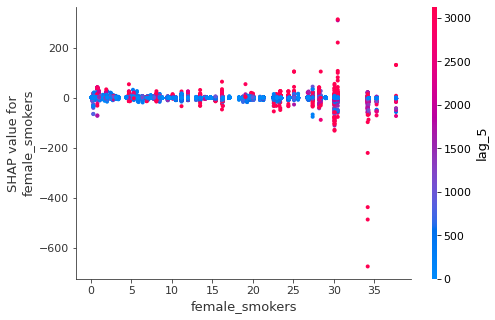

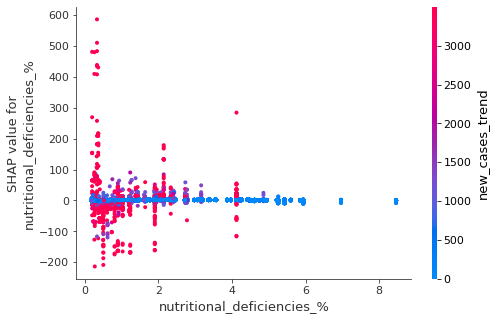

In [ ]:
for col in X_train.columns:
  shap.dependence_plot(col, shap_values, X_train)

In [ ]:
# get the expected value 
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: 1065.726318359375


In [ ]:
shap_values_test = explainer.shap_values(X_test,check_additivity=False)

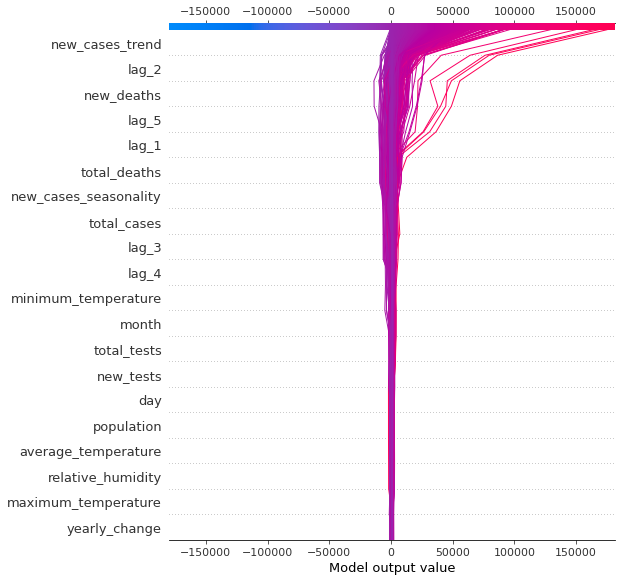

In [ ]:
shap.decision_plot(expected_value, shap_values_test, X_test,ignore_warnings=True)

In [ ]:
X_test.iloc[['3']]

minimum_temperature  ...  nutritional_deficiencies_%
12812                 24.0  ...                    1.906098

[1 rows x 57 columns]

In [ ]:
predicted=xg_reg_shap.predict(X_test)

In [ ]:
predicted=pd.DataFrame(predicted)

In [ ]:
predicted

0
0         89.922882
1       1968.587280
2      10283.662109
3        224.950745
4        247.208984
...             ...
21016   1090.676025
21017     -1.497868
21018      1.934705
21019   1056.496948
21020    249.816101

[21021 rows x 1 columns]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[0], X_test.iloc[[0]])

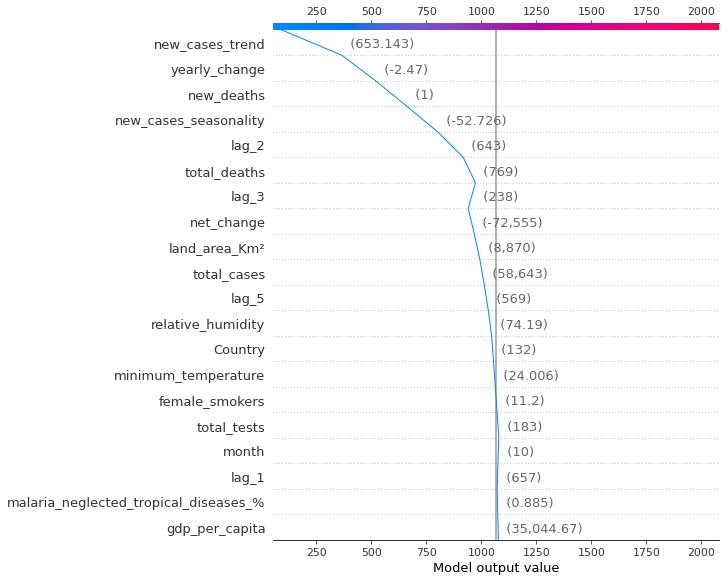

In [ ]:
shap.decision_plot(expected_value, shap_values_test[0], X_test.iloc[[0]],ignore_warnings=True)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[1], X_test.iloc[[1]])

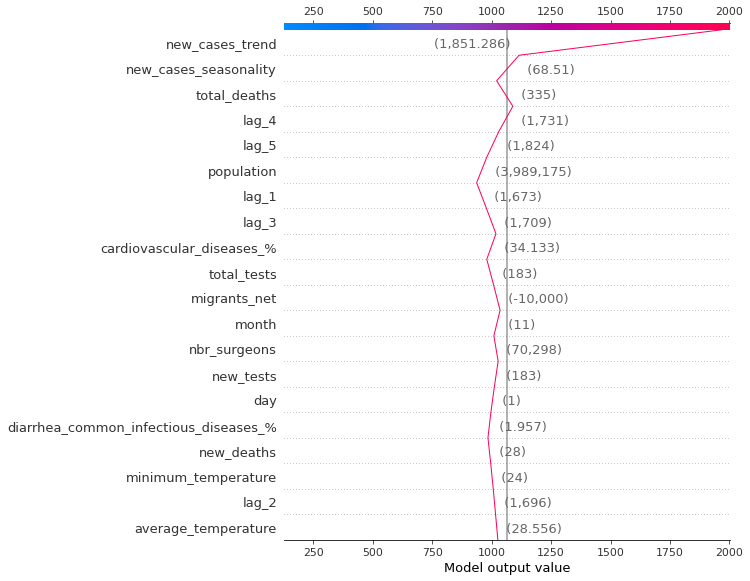

In [ ]:
shap.decision_plot(expected_value, shap_values_test[1], X_test.iloc[[1]],ignore_warnings=True)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[5], X_test.iloc[[5]])

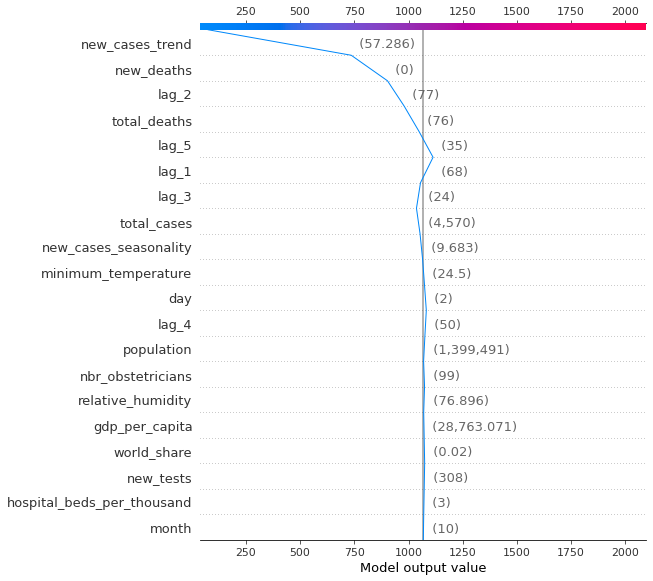

In [ ]:
shap.decision_plot(expected_value, shap_values_test[5], X_test.iloc[[5]],ignore_warnings=True)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[21020], X_test.iloc[[21020]])

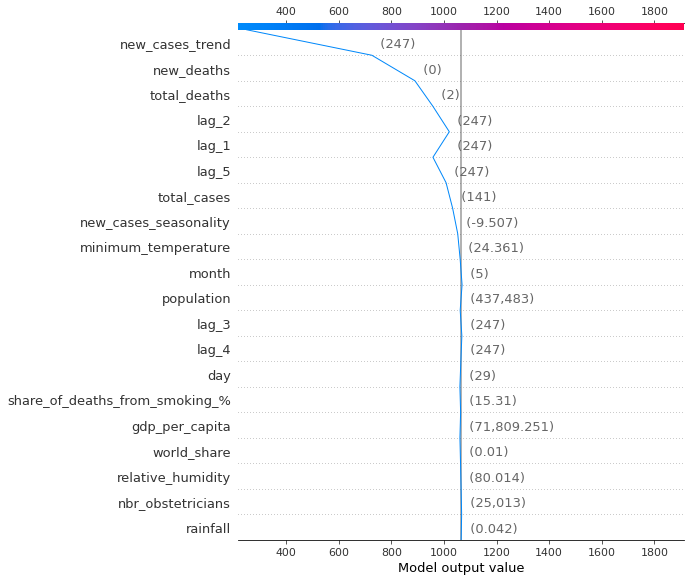

In [ ]:
shap.decision_plot(expected_value, shap_values_test[21020], X_test.iloc[[21020]],ignore_warnings=True)